In [1]:
import imutils
import cv2
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import random
import time
import glob
%matplotlib inline

In [2]:
# Caminho
path = r'C:\Users\shuel\Documents\Workspace\computer-vision\computer-vision-meganha\007-feature-extraction\images'

In [3]:
# Lendo todos os png existentes na pasta Repositorio captchas Cut

# path_repositorio_captcha_cut = path + r'\Captcha_cut'
# filelist_captcha_cut = [f for f in os.listdir(path_repositorio_captcha_cut) if f.endswith("*.png")]

path_repositorio_captcha_cut = path + r'\Captcha_cut'
filelist_captcha_cut = glob.glob(path_repositorio_captcha_cut + "\*.png")
print(filelist_captcha_cut)


['C:\\Users\\shuel\\Documents\\Workspace\\computer-vision\\computer-vision-meganha\\007-feature-extraction\\images\\Captcha_cut\\captcha_pt_0.png', 'C:\\Users\\shuel\\Documents\\Workspace\\computer-vision\\computer-vision-meganha\\007-feature-extraction\\images\\Captcha_cut\\captcha_pt_1.png', 'C:\\Users\\shuel\\Documents\\Workspace\\computer-vision\\computer-vision-meganha\\007-feature-extraction\\images\\Captcha_cut\\captcha_pt_2.png', 'C:\\Users\\shuel\\Documents\\Workspace\\computer-vision\\computer-vision-meganha\\007-feature-extraction\\images\\Captcha_cut\\captcha_pt_3.png', 'C:\\Users\\shuel\\Documents\\Workspace\\computer-vision\\computer-vision-meganha\\007-feature-extraction\\images\\Captcha_cut\\captcha_pt_4.png']


In [4]:
# Deletar os arquivos .png da pasta captchas cut
for f in filelist_captcha_cut:
    os.remove(os.path.join(path_repositorio_captcha_cut, f))

In [5]:
# Lendo todos os png existentes na pasta templates captchas

path_repositorio_captcha = path + r'\templates'
filelist_captcha = glob.glob(path_repositorio_captcha + "\*.png")
print(filelist_captcha)



['C:\\Users\\shuel\\Documents\\Workspace\\computer-vision\\computer-vision-meganha\\007-feature-extraction\\images\\templates\\frame1000.png', 'C:\\Users\\shuel\\Documents\\Workspace\\computer-vision\\computer-vision-meganha\\007-feature-extraction\\images\\templates\\frame152.png', 'C:\\Users\\shuel\\Documents\\Workspace\\computer-vision\\computer-vision-meganha\\007-feature-extraction\\images\\templates\\frame214.png', 'C:\\Users\\shuel\\Documents\\Workspace\\computer-vision\\computer-vision-meganha\\007-feature-extraction\\images\\templates\\frame244.png', 'C:\\Users\\shuel\\Documents\\Workspace\\computer-vision\\computer-vision-meganha\\007-feature-extraction\\images\\templates\\frame28.png', 'C:\\Users\\shuel\\Documents\\Workspace\\computer-vision\\computer-vision-meganha\\007-feature-extraction\\images\\templates\\frame31.png', 'C:\\Users\\shuel\\Documents\\Workspace\\computer-vision\\computer-vision-meganha\\007-feature-extraction\\images\\templates\\frame330.png', 'C:\\Users\\s

In [6]:
print(path_repositorio_captcha)
os.listdir(path_repositorio_captcha)

C:\Users\shuel\Documents\Workspace\computer-vision\computer-vision-meganha\007-feature-extraction\images\templates


['frame1000.png',
 'frame152.png',
 'frame214.png',
 'frame244.png',
 'frame28.png',
 'frame31.png',
 'frame330.png',
 'frame331.png',
 'frame351.png',
 'frame374.png',
 'frame381.png',
 'frame383.png',
 'frame39.png',
 'frame398.png',
 'frame422.png',
 'frame429.png',
 'frame43.png',
 'frame441.png',
 'frame512.png',
 'frame53.png',
 'frame54.png',
 'frame541.png',
 'frame551.png',
 'frame555.png',
 'frame569.png',
 'frame585.png',
 'frame605.png',
 'frame617.png',
 'frame640.png',
 'frame645.png',
 'frame693.png',
 'frame697.png',
 'frame705.png',
 'frame721.png',
 'frame742.png',
 'frame760.png',
 'frame771.png',
 'frame814.png',
 'frame825.png',
 'frame828.png',
 'frame837.png',
 'frame850.png',
 'frame862.png',
 'frame872.png',
 'frame929.png',
 'frame940.png',
 'frame944.png',
 'frame949.png',
 'frame955.png',
 'frame978.png']

In [7]:
# Pegar o captcha
captcha_random = random.choice(filelist_captcha)
main_image = cv2.imread(captcha_random)

In [8]:
# Imagem no espaco HSV
hsv = cv2.cvtColor(main_image, cv2.COLOR_BGR2HSV)

# Limites superior e inferior
lim_inf = np.array([15, 0 ,0])
lim_sup = np.array([103, 255, 255])

color_mask = cv2.inRange(hsv, lim_inf, lim_sup)

In [9]:
# Filtro Mediano
img_mediano = cv2.medianBlur(color_mask, 3)

In [10]:
# Filtro Bilateral
img_bilateral = cv2.bilateralFilter(img_mediano, 9, 75, 75)

In [11]:
# Img Erodida
elementoEstruturante = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
img_erode = cv2.erode(img_bilateral, elementoEstruturante, iterations=1)

In [12]:
# Threshold
img_th = cv2.adaptiveThreshold(img_erode, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 1)

In [13]:
# Dividir o Captcha em 5 e salvar
img_th1 = img_th[0:71, 0:79]
img_th2 = img_th[0:71, 80:159]
img_th3 = img_th[0:71, 160:238]
img_th4 = img_th[0:71, 239:317]
img_th5 = img_th[0:71, 318:]

In [14]:
cv2.imwrite(path + f'\Captcha_cut\captcha_pt_0.png', img_th1)
cv2.imwrite(path + f'\Captcha_cut\captcha_pt_1.png', img_th2)
cv2.imwrite(path + f'\Captcha_cut\captcha_pt_2.png', img_th3)
cv2.imwrite(path + f'\Captcha_cut\captcha_pt_3.png', img_th4)
cv2.imwrite(path + f'\Captcha_cut\captcha_pt_4.png', img_th5)

True

In [15]:
# Lendo todos os png existes na pas Repo captchas Cut
path_repositorio_captcha_cut = path + r'\Captcha_cut'
filelist_captcha_cut = glob.glob(path_repositorio_captcha_cut + "\*.png")
print(filelist_captcha_cut)

['C:\\Users\\shuel\\Documents\\Workspace\\computer-vision\\computer-vision-meganha\\007-feature-extraction\\images\\Captcha_cut\\captcha_pt_0.png', 'C:\\Users\\shuel\\Documents\\Workspace\\computer-vision\\computer-vision-meganha\\007-feature-extraction\\images\\Captcha_cut\\captcha_pt_1.png', 'C:\\Users\\shuel\\Documents\\Workspace\\computer-vision\\computer-vision-meganha\\007-feature-extraction\\images\\Captcha_cut\\captcha_pt_2.png', 'C:\\Users\\shuel\\Documents\\Workspace\\computer-vision\\computer-vision-meganha\\007-feature-extraction\\images\\Captcha_cut\\captcha_pt_3.png', 'C:\\Users\\shuel\\Documents\\Workspace\\computer-vision\\computer-vision-meganha\\007-feature-extraction\\images\\Captcha_cut\\captcha_pt_4.png']


In [16]:
# Lendo todos os png existentes na pasta templates

path_repositorio = path + r'\template_th_bk'
filelist = glob.glob(path_repositorio + "\*.png")
print(filelist)

['C:\\Users\\shuel\\Documents\\Workspace\\computer-vision\\computer-vision-meganha\\007-feature-extraction\\images\\template_th_bk\\1.png', 'C:\\Users\\shuel\\Documents\\Workspace\\computer-vision\\computer-vision-meganha\\007-feature-extraction\\images\\template_th_bk\\2.png', 'C:\\Users\\shuel\\Documents\\Workspace\\computer-vision\\computer-vision-meganha\\007-feature-extraction\\images\\template_th_bk\\3.png', 'C:\\Users\\shuel\\Documents\\Workspace\\computer-vision\\computer-vision-meganha\\007-feature-extraction\\images\\template_th_bk\\4.png', 'C:\\Users\\shuel\\Documents\\Workspace\\computer-vision\\computer-vision-meganha\\007-feature-extraction\\images\\template_th_bk\\5.png', 'C:\\Users\\shuel\\Documents\\Workspace\\computer-vision\\computer-vision-meganha\\007-feature-extraction\\images\\template_th_bk\\6.png', 'C:\\Users\\shuel\\Documents\\Workspace\\computer-vision\\computer-vision-meganha\\007-feature-extraction\\images\\template_th_bk\\7.png', 'C:\\Users\\shuel\\Documen

In [17]:
vetor_letras = []
max_valor_template = []

for j in range(len(filelist_captcha_cut)):

    img_captcha = cv2.imread(filelist_captcha_cut[j], 0)

    

    for i in range(len(filelist)):

        # Ler a imagem template
        path2 = filelist[i]
        template = cv2.imread(path2, 0)

        (height, width) = template.shape[:2]

        temp_found = None
        
        match = cv2.matchTemplate(img_captcha, template, cv2.TM_CCOEFF_NORMED)
        (_, val_max, _, loc_max) = cv2.minMaxLoc(match)

        # Matriz com os valores dos calculos de valores max
        max_valor_template.append([j,{filelist[i]:val_max}])


        print(f'O valor de correspondecia e: {val_max}')
print(max_valor_template)


O valor de correspondecia e: 0.4421255886554718
O valor de correspondecia e: 0.6187844276428223
O valor de correspondecia e: 0.7204555869102478
O valor de correspondecia e: 0.5816056728363037
O valor de correspondecia e: 0.7102839946746826
O valor de correspondecia e: 0.804014265537262
O valor de correspondecia e: 0.5179904699325562
O valor de correspondecia e: 0.7990710139274597
O valor de correspondecia e: 0.770590603351593
O valor de correspondecia e: 0.6646583676338196
O valor de correspondecia e: 0.9793152213096619
O valor de correspondecia e: 0.6786394715309143
O valor de correspondecia e: 0.7569126486778259
O valor de correspondecia e: 0.7436687350273132
O valor de correspondecia e: 0.7751541137695312
O valor de correspondecia e: 0.5853567719459534
O valor de correspondecia e: 0.7708638906478882
O valor de correspondecia e: 0.7158341407775879
O valor de correspondecia e: 0.3404548466205597
O valor de correspondecia e: 0.5967352986335754
O valor de correspondecia e: 0.69113546609

In [18]:
# Organizando o vetor com os candidatos a solução de acordo com a pontuacao do vetor max_valor_template
mat = pd.DataFrame(max_valor_template)

list_mat = list(mat.groupby([0]))
# print(list_mat)

campeoes = [] # Matriz com os templates com melhor valor_max calculado

for i in range(len(list_mat)):
    a = list_mat[i][1]
    pontos = [list(valor.values()) for valor in a[1]]
    pontuacao = [ponto[0] for ponto in pontos]
    campea = np.flip(np.argsort(pontuacao))

    campeoes.append(campea[0])

print(campeoes) 

[10, 24, 14, 27, 13]


In [19]:
# Vetor dos captachas solucao

letras_captchas = []
for j in range(len(campeoes)):
    letras_captchas.append(filelist[campeoes[j]].split('.')[0][-1:])

letras_captchas_total = pd.Series(letras_captchas)

letras_captchas_total = letras_captchas_total.str.replace('C-Dilha', 'Ç')

letras_captchas_total = letras_captchas_total.tolist()
print(letras_captchas_total)
print('\n')
print(captcha_random)

['B', 'O', 'E', 'R', 'D']


C:\Users\shuel\Documents\Workspace\computer-vision\computer-vision-meganha\007-feature-extraction\images\templates\frame837.png


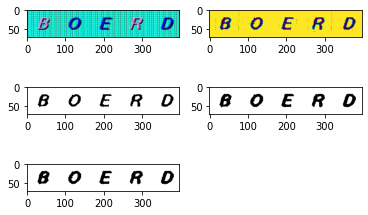

In [20]:
plt.subplot(3,2,1), plt.imshow(main_image)
plt.subplot(3,2,2), plt.imshow(color_mask)
plt.subplot(3,2,3), plt.imshow(img_bilateral, cmap='gray')
plt.subplot(3,2,4), plt.imshow(img_erode, cmap='gray')
plt.subplot(3,2,5), plt.imshow(img_th, cmap='gray')
plt.show()